<a href="https://colab.research.google.com/github/ValentineMwangi1/Job-market-analysis/blob/main/Job_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-4188292462.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.values, y=job_counts.index, palette="viridis")


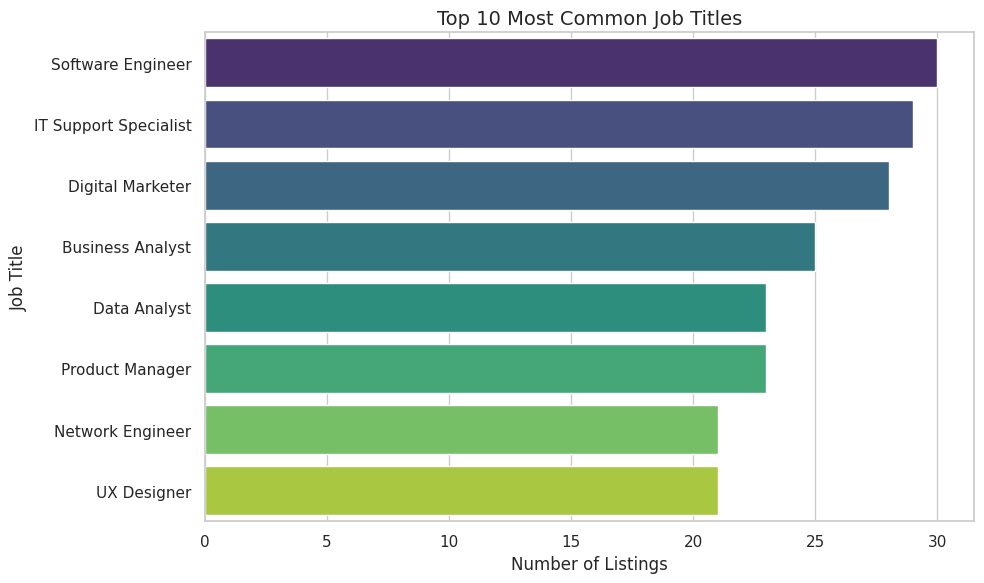

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df_jobs = pd.read_csv("/content/job_listings.csv")

# Set plot style
sns.set(style="whitegrid")

# Count of job titles
job_counts = df_jobs['job_title'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.values, y=job_counts.index, palette="viridis")
plt.title("Top 10 Most Common Job Titles", fontsize=14)
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2-381589104.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Skill", data=skills_df, palette="magma")


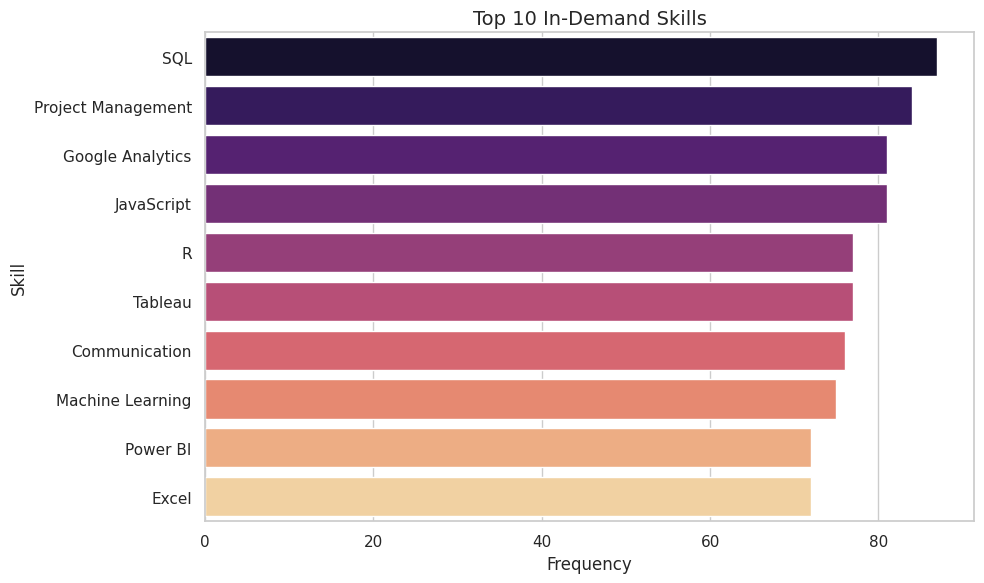

In [2]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_jobs = pd.read_csv("job_listings.csv")

# Split and flatten all skill lists
all_skills = df_jobs['skills'].dropna().apply(lambda x: [skill.strip() for skill in x.split(',')])
flat_skills = [skill for sublist in all_skills for skill in sublist]

# Count skill frequencies
skill_counts = Counter(flat_skills)
top_skills = skill_counts.most_common(10)

# Convert to DataFrame for plotting
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Skill", data=skills_df, palette="magma")
plt.title("Top 10 In-Demand Skills", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3-3066886530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="Blues_r")


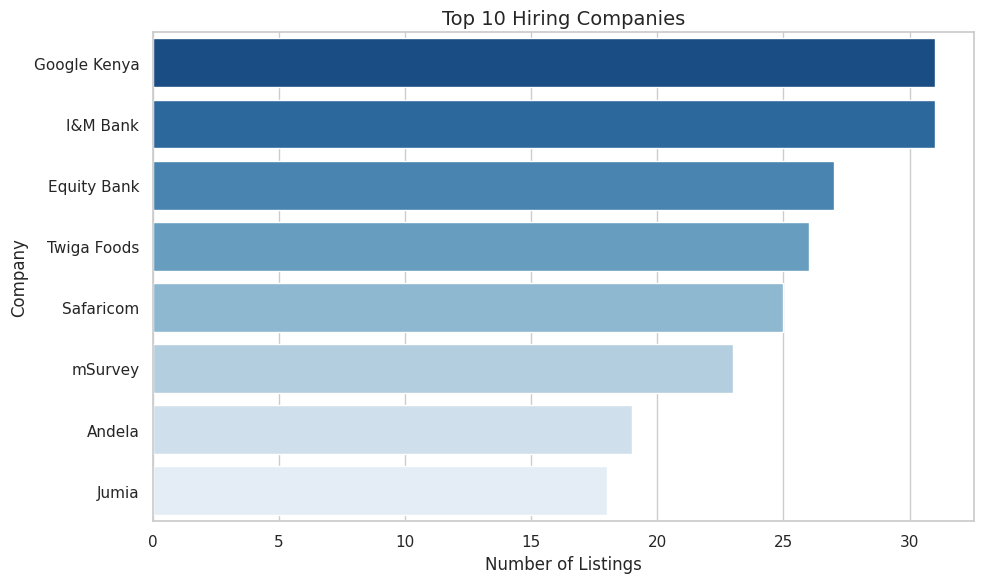

In [3]:
# Top 10 companies with most job listings
top_companies = df_jobs['company'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="Blues_r")
plt.title("Top 10 Hiring Companies", fontsize=14)
plt.xlabel("Number of Listings")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-370558079.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette="coolwarm")


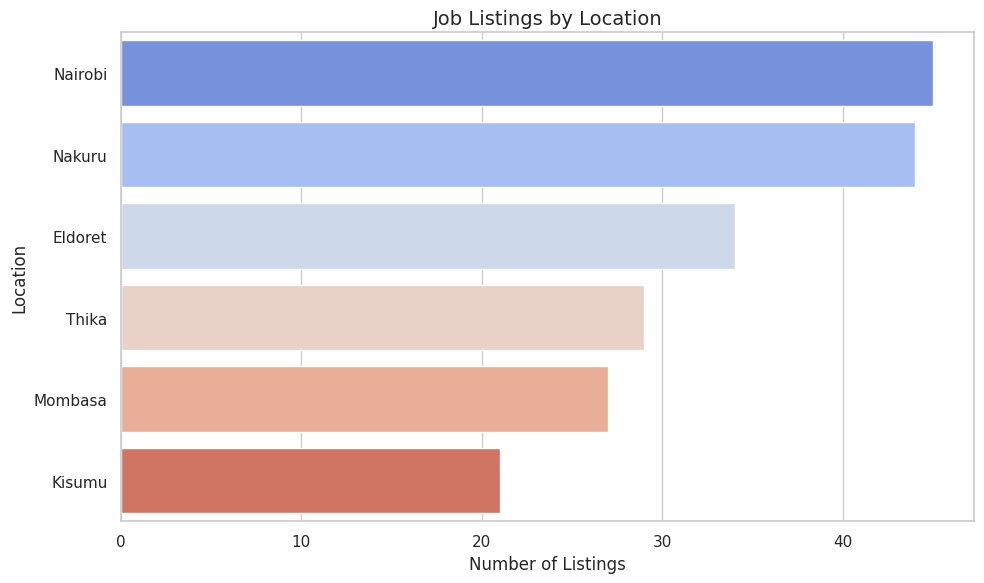

In [4]:
# Job count per location
location_counts = df_jobs['location'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette="coolwarm")
plt.title("Job Listings by Location", fontsize=14)
plt.xlabel("Number of Listings")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


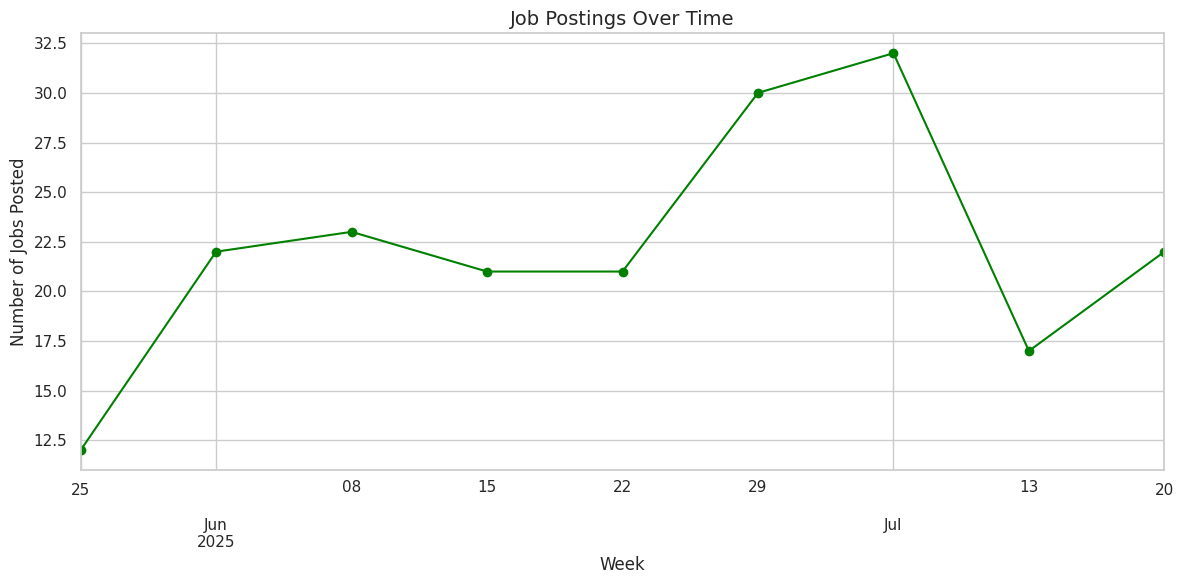

In [5]:
# Convert posted_date to datetime
df_jobs['posted_date'] = pd.to_datetime(df_jobs['posted_date'])

# Count by week
jobs_by_week = df_jobs.groupby(pd.Grouper(key='posted_date', freq='W')).size()

# Plot
plt.figure(figsize=(12, 6))
jobs_by_week.plot(kind='line', marker='o', color='green')
plt.title("Job Postings Over Time", fontsize=14)
plt.xlabel("Week")
plt.ylabel("Number of Jobs Posted")
plt.grid(True)
plt.tight_layout()
plt.show()


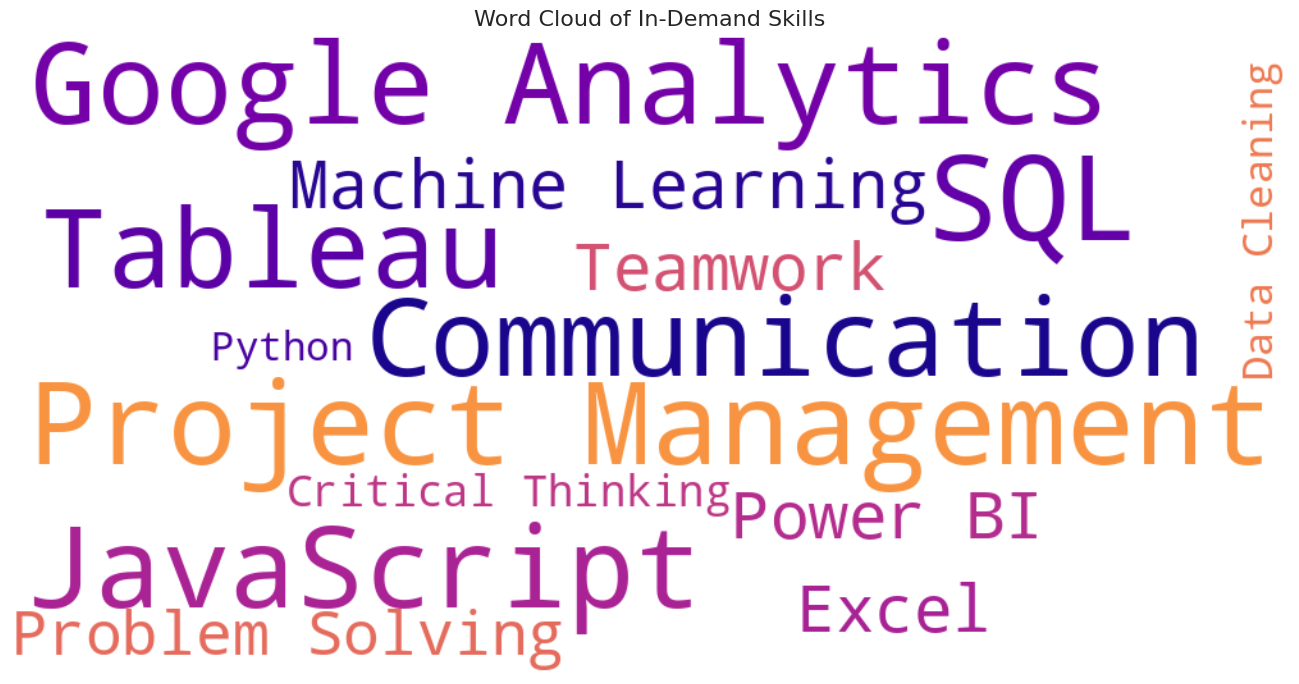

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten all skills into one list
all_skills = df_jobs['skills'].dropna().apply(lambda x: [s.strip() for s in x.split(',')])
flat_skills = [skill for sublist in all_skills for skill in sublist]

# Create a single string of skills
skills_string = ' '.join(flat_skills)

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(skills_string)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of In-Demand Skills", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-4259123530.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Skill", data=role_skills_df, palette="Spectral")


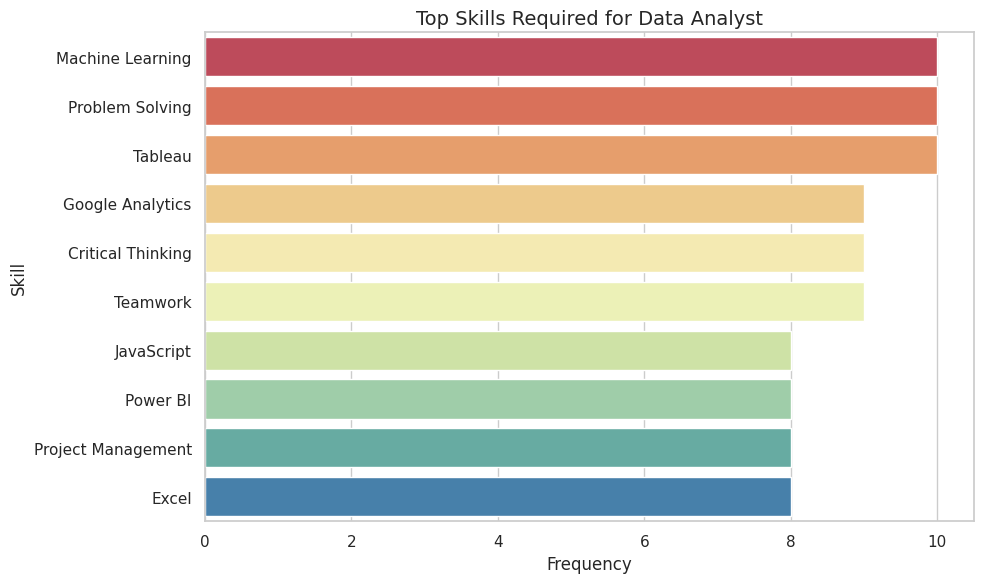

In [7]:
# Filter for a specific job title
target_title = 'Data Analyst'
filtered_df = df_jobs[df_jobs['job_title'].str.contains(target_title, case=False, na=False)]

# Extract and count skills for that role
role_skills = filtered_df['skills'].dropna().apply(lambda x: [s.strip() for s in x.split(',')])
flat_role_skills = [skill for sublist in role_skills for skill in sublist]

# Count most common skills
from collections import Counter
role_skill_counts = Counter(flat_role_skills).most_common(10)
role_skills_df = pd.DataFrame(role_skill_counts, columns=['Skill', 'Count'])

# Plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Skill", data=role_skills_df, palette="Spectral")
plt.title(f"Top Skills Required for {target_title}", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


In [8]:
# Ensure datetime format
df_jobs['posted_date'] = pd.to_datetime(df_jobs['posted_date'])

# Aggregate weekly job postings
job_trend = df_jobs.groupby(pd.Grouper(key='posted_date', freq='W')).size().rename("job_count").reset_index()


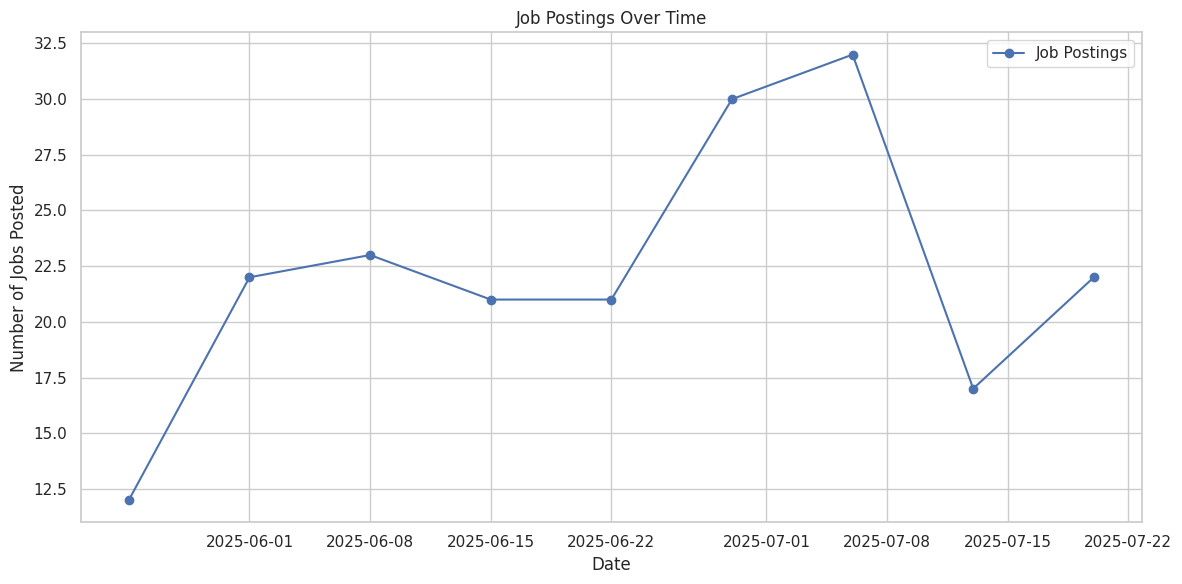

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(job_trend['posted_date'], job_trend['job_count'], marker='o', label='Job Postings')
plt.title("Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Jobs Posted")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [11]:
!pip install prophet


In [12]:
from prophet import Prophet


In [13]:
# Reset and rename columns
df_prophet = job_trend.reset_index().rename(columns={
    'posted_date': 'ds',
    'job_count': 'y'
})


In [14]:
# Create and fit model
model = Prophet(weekly_seasonality=True)
model.fit(df_prophet)

# Make future dataframe
future = model.make_future_dataframe(periods=12, freq='W')  # Forecast next 12 weeks
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hh7ge24/j40ced29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hh7ge24/zuindpb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67317', 'data', 'file=/tmp/tmp_hh7ge24/j40ced29.json', 'init=/tmp/tmp_hh7ge24/zuindpb8.json', 'output', 'file=/tmp/tmp_hh7ge24/prophet_modeljhpn_r0y/prophet_model-20250719101837.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

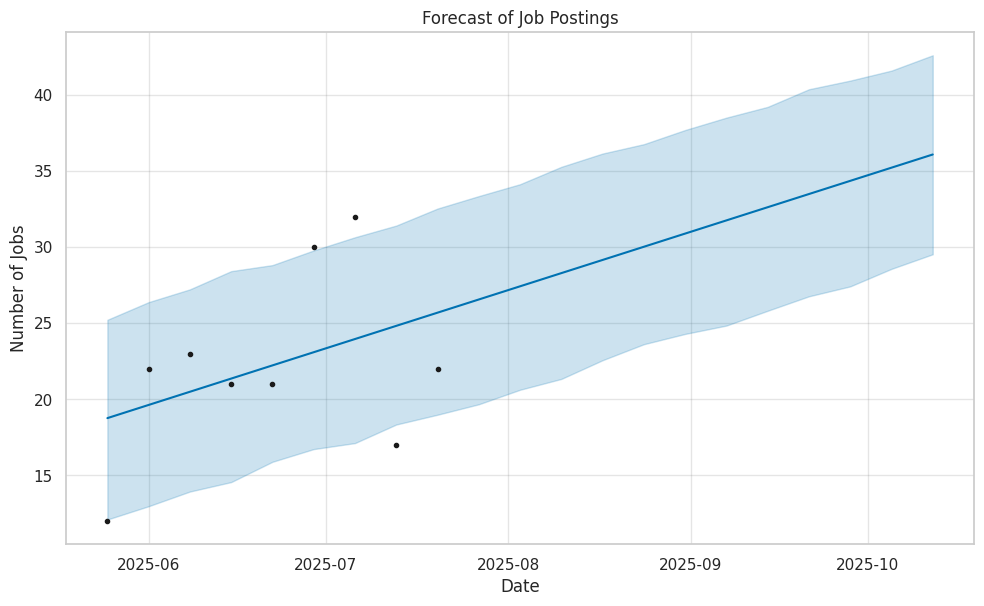

In [15]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Forecast of Job Postings")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.show()


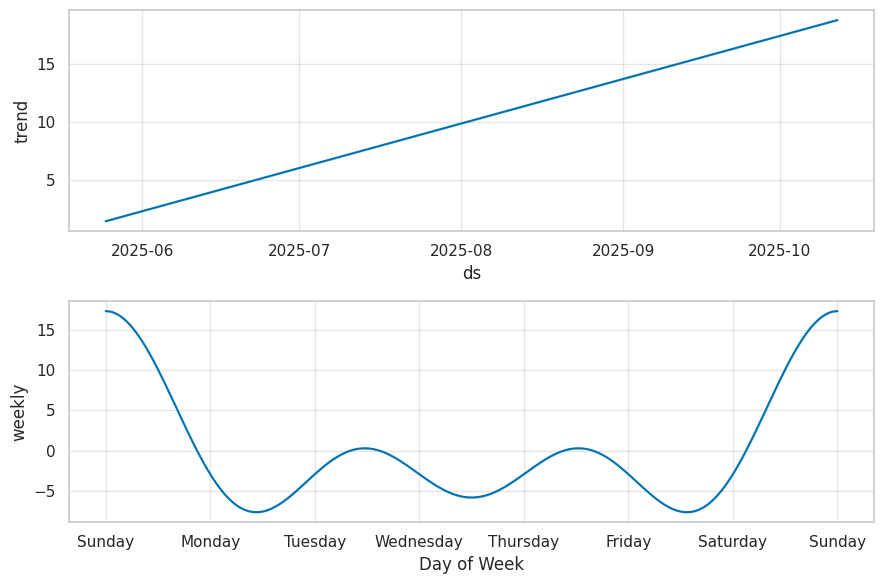

In [16]:
fig2 = model.plot_components(forecast)
plt.show()
